## Limpieza de Datos

In [39]:
import pandas as pd
import glob

# Cargar los archivos de un directorio
archivos = glob.glob('./Data/*.csv')

# Crear lista para muestras
muestras = []

# Iterar cada archivo para sacar una muestra aleatoria
for archivo in archivos:
    data = pd.read_csv(archivo)
    
    muestra = data.sample(frac=0.2)  
    muestras.append(muestra)

# Concatenar las muestras
muestra_concatenada = pd.concat(muestras, ignore_index=True)

# Guardar la muestra concatenada
muestra_concatenada.to_csv('./Data.csv', index=False)


C:\Users\denis\AppData\Local\Temp\ipykernel_5132\1196747608.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(archivo)
C:\Users\denis\AppData\Local\Temp\ipykernel_5132\1196747608.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(archivo)
C:\Users\denis\AppData\Local\Temp\ipykernel_5132\1196747608.py:12: DtypeWarning: Columns (2,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(archivo)
C:\Users\denis\AppData\Local\Temp\ipykernel_5132\1196747608.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(archivo)
C:\Users\denis\AppData\Local\Temp\ipykernel_5132\1196747608.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(archivo)
C:\Users\de

In [53]:
# Leer el archivo   
df = pd.read_csv('Data.csv')

# Forma del dataframe
df.shape

C:\Users\denis\AppData\Local\Temp\ipykernel_5132\3800025677.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data.csv')


(1683090, 10)

In [54]:
# Información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683090 entries, 0 to 1683089
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Genero_Usuario         1683090 non-null  object 
 1   Edad_Usuario           1683090 non-null  int64  
 2   Bici                   1683090 non-null  object 
 3   Ciclo_Estacion_Retiro  1683090 non-null  int64  
 4   Fecha_Retiro           1683090 non-null  object 
 5   Hora_Retiro            1683090 non-null  object 
 6   Ciclo_Estacion_Arribo  1683090 non-null  int64  
 7   Fecha_Arribo           1683090 non-null  object 
 8   Hora_Arribo            1683090 non-null  object 
 9   Unnamed: 9             0 non-null        float64
dtypes: float64(1), int64(3), object(6)
memory usage: 128.4+ MB


In [55]:
# Revision de columnas 9 
df.iloc[:, 9]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1683085   NaN
1683086   NaN
1683087   NaN
1683088   NaN
1683089   NaN
Name: Unnamed: 9, Length: 1683090, dtype: float64

In [56]:
# Eliminación de columnas 9 
df.drop(df.columns[9], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683090 entries, 0 to 1683089
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   Genero_Usuario         1683090 non-null  object
 1   Edad_Usuario           1683090 non-null  int64 
 2   Bici                   1683090 non-null  object
 3   Ciclo_Estacion_Retiro  1683090 non-null  int64 
 4   Fecha_Retiro           1683090 non-null  object
 5   Hora_Retiro            1683090 non-null  object
 6   Ciclo_Estacion_Arribo  1683090 non-null  int64 
 7   Fecha_Arribo           1683090 non-null  object
 8   Hora_Arribo            1683090 non-null  object
dtypes: int64(3), object(6)
memory usage: 115.6+ MB


In [ ]:
# Revision de datos nulos 
df.isnull().sum()

Genero_Usuario           0
Edad_Usuario             0
Bici                     0
Ciclo_Estacion_Retiro    0
Fecha_Retiro             0
Hora_Retiro              0
Ciclo_Estacion_Arribo    0
Fecha_Arribo             0
Hora_Arribo              0
dtype: int64

In [59]:
# Revision de los primeros 5 registros
df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,32,4359,26,02/01/2019,14:32:04,86,02/01/2019,14:37:14
1,M,34,4329,24,16/01/2019,10:45:34,26,16/01/2019,10:54:50
2,M,29,12225,212,28/01/2019,18:45:22,463,28/01/2019,18:59:33
3,F,18,1515,278,24/01/2019,14:06:06,64,24/01/2019,14:19:19
4,M,36,4371,273,31/01/2019,8:27:32,17,31/01/2019,8:43:49


In [64]:
print(df['Hora_Retiro'])

0          14:32:04
1          10:45:34
2          18:45:22
3          14:06:06
4           8:27:32
             ...   
1683085    11:40:27
1683086    10:40:44
1683087     8:19:23
1683088     7:16:12
1683089     8:32:08
Name: Hora_Retiro, Length: 1683090, dtype: object


In [67]:
# Transformación de fechas y horas 
df['Fecha_Retiro'] = pd.to_datetime(df['Fecha_Retiro'], format='%d/%m/%Y')

df['Hora_Retiro'] = pd.to_timedelta(df['Hora_Retiro'])
df['Hora_Retiro'] = df['Hora_Retiro'].dt.components.apply(
    lambda x: f"{x.hours:02}:{x.minutes:02}:{x.seconds:02}", axis=1
)
df['Fecha_Arribo'] = pd.to_datetime(df['Fecha_Arribo'], format='%d/%m/%Y') 

df['Hora_Arribo'] = pd.to_timedelta(df['Hora_Arribo'])
df['Hora_Arribo'] = df['Hora_Arribo'].dt.components.apply(
    lambda x: f"{x.hours:02}:{x.minutes:02}:{x.seconds:02}", axis=1
)


df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,32,4359,26,2019-01-02,14:32:04,86,2019-01-02,14:37:14
1,M,34,4329,24,2019-01-16,10:45:34,26,2019-01-16,10:54:50
2,M,29,12225,212,2019-01-28,18:45:22,463,2019-01-28,18:59:33
3,F,18,1515,278,2019-01-24,14:06:06,64,2019-01-24,14:19:19
4,M,36,4371,273,2019-01-31,08:27:32,17,2019-01-31,08:43:49


In [77]:
# Exploración de datos generales 

# Genero
print(df['Genero_Usuario'].unique())

# Edad
print(sorted(df['Edad_Usuario'].unique()))


['M' 'F']
[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 96, 97, 101, 108, 119]


## Visualización

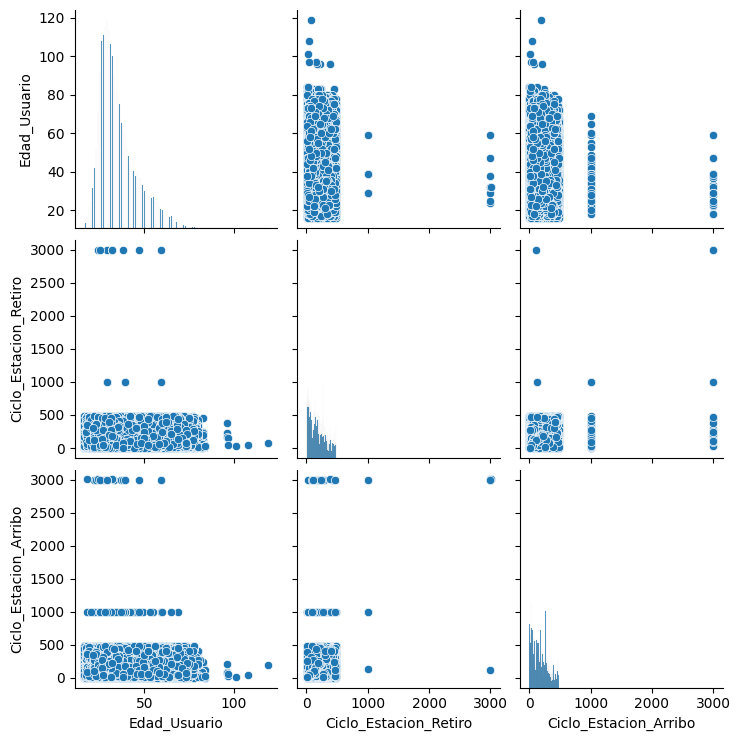

In [78]:
# Histogramas 
import seaborn as sns
import matplotlib.pyplot as plt

df_vis = df[['Edad_Usuario', 'Genero_Usuario', 'Ciclo_Estacion_Retiro', 'Ciclo_Estacion_Arribo']]
sns.pairplot(df_vis)



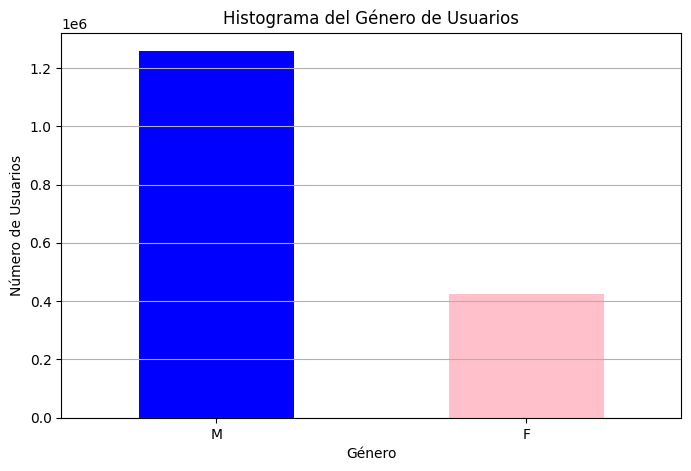

In [89]:
# Histograma genero 
plt.figure(figsize=(8, 5))
df['Genero_Usuario'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Histograma del Género de Usuarios')
plt.xlabel('Género')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)  
plt.grid(axis='y') 
plt.show()


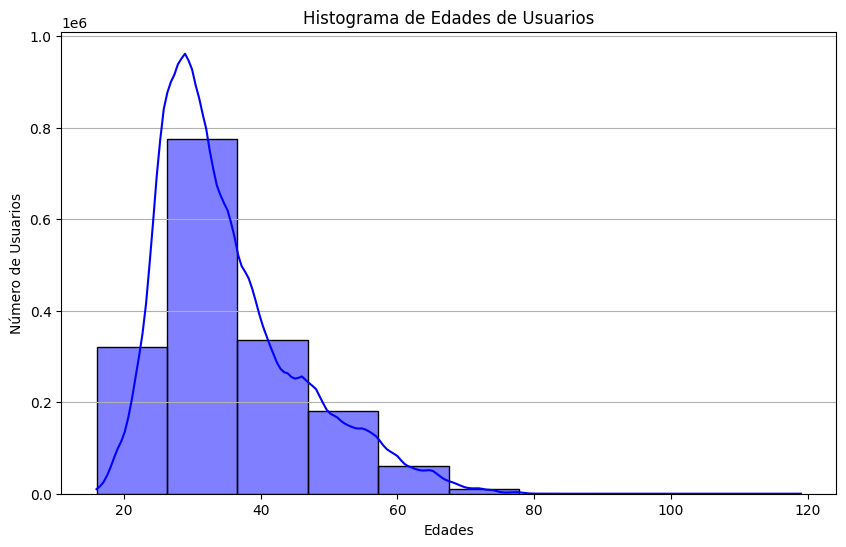

In [91]:
# Histograma de edades

plt.figure(figsize=(10, 6))

sns.histplot(df['Edad_Usuario'], bins=10, kde=True, color='blue')
plt.title('Histograma de Edades de Usuarios')
plt.xlabel('Edades')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)  
plt.grid(axis='y') 
plt.show()

In [95]:
# Dectar outliers de edad 
import numpy as np

# Calcular el rango intercuartílico
Q1 = df['Edad_Usuario'].quantile(0.25)  
Q3 = df['Edad_Usuario'].quantile(0.75) 
IQR = Q3 - Q1 

# Definir los límites 
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Detectar los outliers
outliers = df[(df['Edad_Usuario'] < limite_inferior) | (df['Edad_Usuario'] > limite_superior)]
print(f"Outliers detectados:\n{outliers}")

# Eliminar outliers
df = df[(df['Edad_Usuario'] >= limite_inferior) & (df['Edad_Usuario'] <= limite_superior)]


Outliers detectados:
        Genero_Usuario  Edad_Usuario   Bici  Ciclo_Estacion_Retiro  \
36                   M            59  12061                    192   
43                   M            66   9842                    315   
46                   M            62   8519                     28   
64                   M            61   3021                     98   
89                   M            61  10077                     92   
...                ...           ...    ...                    ...   
1682999              M            69   9668                    141   
1683029              M            65   8329                    217   
1683040              M            60   7464                    244   
1683054              M            61  10367                     71   
1683085              F            62   8365                    392   

        Fecha_Retiro Hora_Retiro  Ciclo_Estacion_Arribo Fecha_Arribo  \
36        2019-01-18    07:41:34                     16   2019-01-

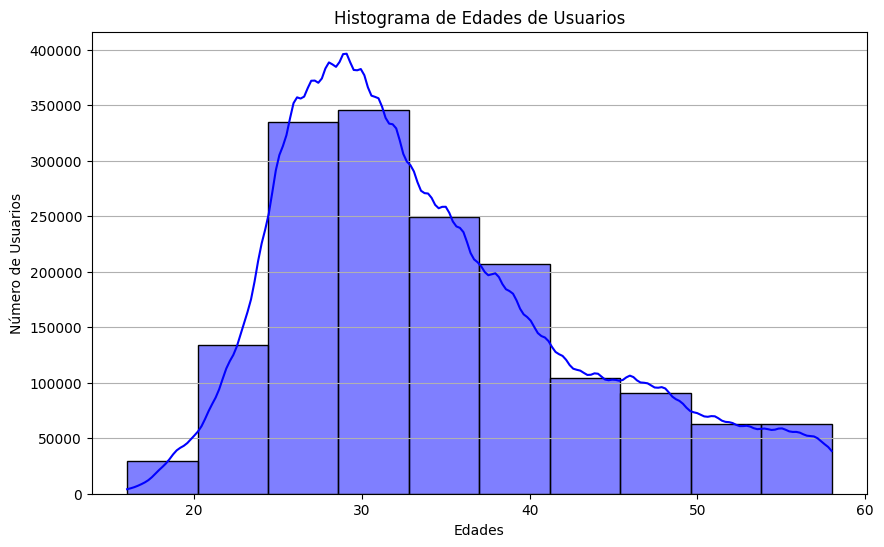

In [98]:
# Histograma de edades (sin outliers)

df_vis = df[['Edad_Usuario', 'Genero_Usuario', 'Ciclo_Estacion_Retiro', 'Ciclo_Estacion_Arribo']]

plt.figure(figsize=(10, 6))

sns.histplot(df['Edad_Usuario'], bins=10, kde=True, color='blue')
plt.title('Histograma de Edades de Usuarios')
plt.xlabel('Edades')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)  
plt.grid(axis='y') 
plt.show()


In [100]:
print(df['Edad_Usuario'].min())
print(df['Edad_Usuario'].max())

16
58
